In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vishakhdapat/fake-news-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\vishakhdapat\fake-news-detection\versions\1


In [22]:
# importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
import nltk 
nltk.download("stopwords", quiet=True) 
nltk.download('punkt_tab')
nltk.download('punkt',quiet=True)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
import os 

new_path = os.listdir(path)
print(new_path)

['fake_and_real_news.csv']


In [25]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\USER\.cache\kagglehub\datasets\vishakhdapat\fake-news-detection\versions\1\fake_and_real_news.csv")
data.head(5)

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [26]:
print(f"\n Information about the datasets\n")
data.info()


 Information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9900 entries, 0 to 9899
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    9900 non-null   object
 1   label   9900 non-null   object
dtypes: object(2)
memory usage: 154.8+ KB


In [27]:
# checking for null values
print("Checking for null values")
data.isnull().sum()

Checking for null values


Text     0
label    0
dtype: int64

In [28]:
# checking for duplicates
print("Checking for duplicates")
print(f'\nNumber of duplicated rows: ',data.duplicated().sum())
data.duplicated()
data = data.drop_duplicates()
print(f'\nAfter dropping duplicated rows: ',data.duplicated().sum())

Checking for duplicates

Number of duplicated rows:  35

After dropping duplicated rows:  0


In [29]:
data.shape

(9865, 2)

In [30]:
data["label"].value_counts()

label
Fake    5000
Real    4865
Name: count, dtype: int64

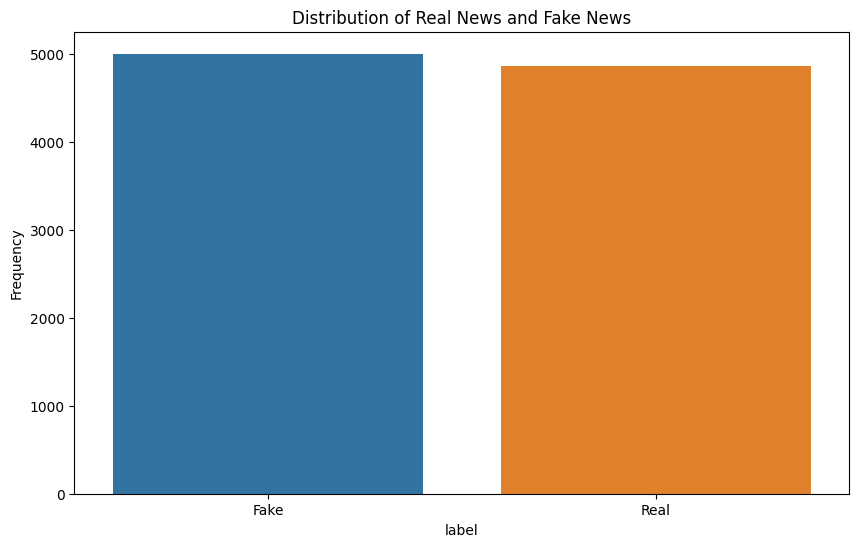

In [31]:
plt.figure(figsize = (10,6))

sns.countplot(x="label",data=data, hue="label")
plt.ylabel("Frequency")
plt.title("Distribution of Real News and Fake News")
plt.show()

In [37]:
# Text preprocessing 

def preprocess_text(text):
    text=text.lower()
    
    
    text = re.sub(r'[^a-z\s]', '', text) # remove special characters 
    
    text = text.lower()
    
    #Tokenize the text
    tokens = word_tokenize(text)
    
    # remove the stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    
    return ' '.join(tokens)
    
data['text_processed'] = data['Text'].apply(preprocess_text)

In [39]:
# Training the model
X = data['text_processed']
y = data['label']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [40]:
# TFIDF vectorization

tfidf = TfidfVectorizer(
    max_features=1000,
    min_df=2,
    max_df=0.8,
    ngram_range= (1,2),
    sublinear_tf= True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [41]:
# Logistic Regression Training

log_model = LogisticRegression(
    max_iter = 1000,
    random_state = 42,
    multi_class='multinomial',
    solver = 'lbfgs'
)
log_model.fit(X_train_tfidf,y_train)

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

In [42]:
y_pred = log_model.predict(X_test_tfidf)

# accuracy and classification report
print(f"Accuracy:", accuracy_score(y_test,y_pred))
print("\n Classification Report: \n ", classification_report(y_test,y_pred))

Accuracy: 0.9979726305119108

 Classification Report: 
                precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      1000
        Real       1.00      1.00      1.00       973

    accuracy                           1.00      1973
   macro avg       1.00      1.00      1.00      1973
weighted avg       1.00      1.00      1.00      1973



TF-IDF Model Confusion Matrix:
 [[999   1]
 [  3 970]]


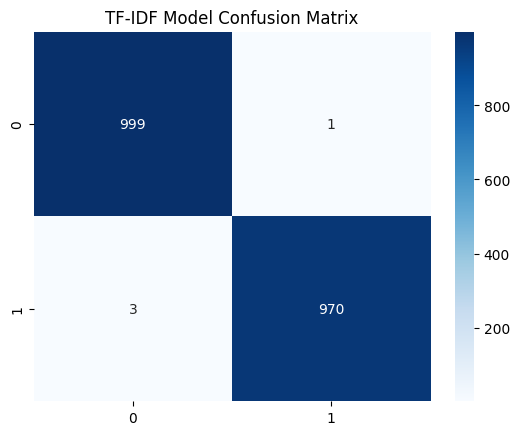

In [43]:
# Confusion matrix for TF-IDF model
cm_tfidf = confusion_matrix(y_test, y_pred)
print("TF-IDF Model Confusion Matrix:\n", cm_tfidf)
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues')
plt.title("TF-IDF Model Confusion Matrix")
plt.show()